In [9]:
from test import Test
from calculator import Calculator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cal=Calculator()
cal.read_excel('Data2.xlsx')
order=3
m=cal.M_p[order]
L_s=cal.L_init[order]
ST=cal.ST[order]

In [3]:
te=Test()
te.con.set_M_p(m)
te.cal_ML_simple(ST,L_s)

(4.999998291957781, 4.268409346444568e-05, -6261686.604276723)

In [10]:
c_P,c_T,c_M=te.con.c_P,te.con.c_T,te.con.c_M
r,P,T,M,L=te.r,te.P,te.T,te.M,te.L
G=te.g
dG=te.dg
dP=c_P*M*P/(T*r**2)
dT=np.ones(len(dP))
for i in range(len(dT)):
    dT[i]=min(c_T*1e24*abs(L[i])*P[i]**2*T[i]**(-3)/M[i],te.con.g_ad)*(T[i]*dP[i]/P[i])
dsigma=(-0.5*dP/P)+(0.75/T+te.con.sigma_2/T**2)*dT
ddG=6*G/r**2+((-0.5*dP/P)+(0.75/T+te.con.sigma_2/T**2)*dT)*dG-(r>te.con.depth)*2*te.con.M_v*(1/r-te.con.depth**2/r**3)/te.con.c**2/te.con.R_B

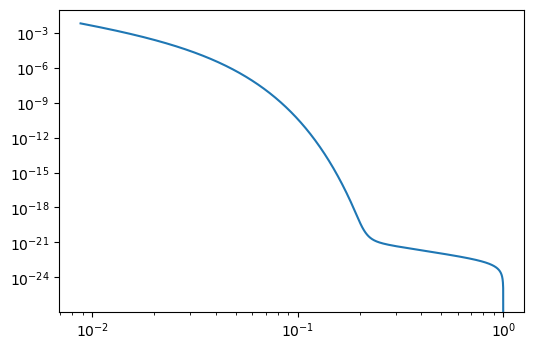

In [7]:
fig=plt.figure(dpi=100)
plt.loglog(r,abs(g)/r/te.con.R_B)
plt.show()

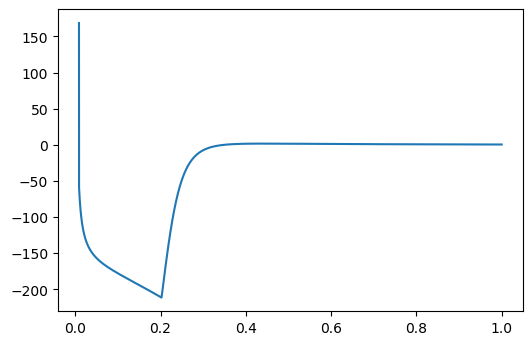

In [11]:
fig=plt.figure(dpi=100)
plt.plot(r,dsigma)
plt.show()